In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image

## You can download the image using the following `wget` command:

In [2]:
! wget "https://cdn.i-scmp.com/sites/default/files/d8/images/2020/10/28/vampire.jpg"

--2025-05-14 17:20:46--  https://cdn.i-scmp.com/sites/default/files/d8/images/2020/10/28/vampire.jpg
Resolving cdn.i-scmp.com (cdn.i-scmp.com)... 104.16.29.106, 104.16.28.106, 2606:4700::6810:1c6a, ...
Connecting to cdn.i-scmp.com (cdn.i-scmp.com)|104.16.29.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262534 (256K) [image/jpeg]
Saving to: ‘vampire.jpg’

vampire.jpg         100%[===================>] 256.38K  --.-KB/s    in 0.01s   

2025-05-14 17:20:47 (16.9 MB/s) - ‘vampire.jpg’ saved [262534/262534]



# Resized  Image

- Below is the resized image (500x300 pixels):




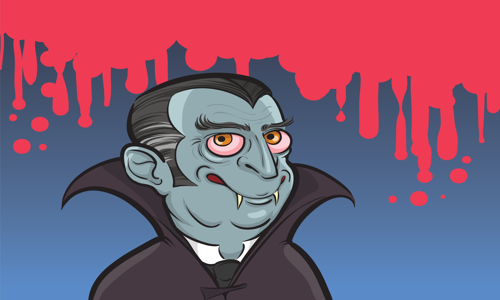

In [3]:
image=Image.open("/kaggle/working/vampire.jpg")
image_logo=image.resize((500,300))
image_text=image.resize((500,300))
image_logo

In [4]:
! wget "https://t3.ftcdn.net/jpg/06/20/31/04/360_F_620310483_DNhQ5nSaAYi49PIatqddm3vRSGTST2ZK.jpg"

--2025-05-14 17:20:47--  https://t3.ftcdn.net/jpg/06/20/31/04/360_F_620310483_DNhQ5nSaAYi49PIatqddm3vRSGTST2ZK.jpg
Resolving t3.ftcdn.net (t3.ftcdn.net)... 151.101.129.91, 151.101.193.91, 151.101.65.91, ...
Connecting to t3.ftcdn.net (t3.ftcdn.net)|151.101.129.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32246 (31K) [image/jpeg]
Saving to: ‘360_F_620310483_DNhQ5nSaAYi49PIatqddm3vRSGTST2ZK.jpg’

360_F_620310483_DNh 100%[===================>]  31.49K  --.-KB/s    in 0.001s  

2025-05-14 17:20:47 (41.0 MB/s) - ‘360_F_620310483_DNhQ5nSaAYi49PIatqddm3vRSGTST2ZK.jpg’ saved [32246/32246]



## Logo Image

- Below is the resized logo image (64x64 pixels):




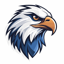

In [5]:
logo=Image.open("/kaggle/working/360_F_620310483_DNhQ5nSaAYi49PIatqddm3vRSGTST2ZK.jpg")
logo=logo.resize((64,64))
logo

# Image Processing Steps

- **Main Image**: The main image was resized to 500x300 pixels for display purposes.
- **Logo Image**: The logo image was resized to 64x64 pixels to fit the layout.

#### Both images were converted to RGB format for further processing:
- The **main image** has dimensions `h_image x w_image`.
- The **logo** has dimensions `h_logo x w_logo`.

These dimensions were used to ensure proper alignment and scaling for display.


In [6]:
image_logow=np.array(image_logo.convert("RGB"))
h_image,w_image,_=image_logow.shape
logo=np.array(logo.convert("RGB"))
h_logo,w_logo,_=logo.shape

# Image Alignment and Cropping

To center the logo on the main image, the following steps were performed:

1. **Center of the Main Image**: The center of the main image was calculated using the height (`h_image`) and width (`w_image`) to determine the `center_y` and `center_x`.
2. **Center of the Logo**: Similarly, the logo's center was calculated using its height (`h_logo`) and width (`w_logo`) to determine the `top_y` and `left_x`.
3. **Defining the Cropping Area**: Using these coordinates, the cropping area for the logo was determined:
   - **Top and Bottom**: The top (`top_y`) and bottom (`bottom_y`) edges of the logo were calculated.
   - **Left and Right**: The left (`left_x`) and right (`right_x`) edges were defined for the logo to be positioned correctly on the main image.

This ensures that the logo is perfectly centered on the main image.


In [7]:
center_y=int(h_image/2)
center_x=int(w_image/2)
top_y=center_y=int(h_logo/2)
left_x=center_x-int(w_logo/2)
bottom_y=top_y+h_logo
right_x=left_x+w_logo

# Image Overlay and Adjustments

The following operations were performed to overlay the logo on the main image:

1. **Region of Interest (ROI)**: A region of interest (ROI) was defined in the main image where the logo will be placed. This region was extracted based on the calculated coordinates (`top_y`, `bottom_y`, `left_x`, `right_x`).
  
2. **Image Blending**: The logo was blended into the main image using the `cv2.addWeighted` method, which applies a weighted sum to both the ROI of the main image and the logo. The blending ensures a smooth transition.

3. **Adding Lines for Reference**: Red lines were drawn across the middle of the image to mark the horizontal center, using `cv2.line`. These lines help visualize the alignment and placement of the logo.

4. **Final Overlay**: After blending the logo into the ROI, the result was placed back into the main image, completing the overlay process.

This results in a centered and blended logo on the main image, with clear visual references for alignment.


In [8]:
roi=image_logow[top_y:bottom_y,left_x:right_x]
result=cv2.addWeighted(roi,1,logo,1,0)
cv2.line(image_logow,(0,center_y),(left_x,center_y),(0,0,255),1)
cv2.line(image_logow,(right_x,center_y),(w_image,center_y),(0,0,255),1)
image_logow[top_y:bottom_y,left_x:right_x]=result

# Final Image Conversion

- After performing the overlay and image blending, the processed image was converted back into an **Image** object using the `Image.fromarray` method. This ensures that the final result is in a proper image format for further manipulation or display.

The final processed image is now ready to be saved or displayed.


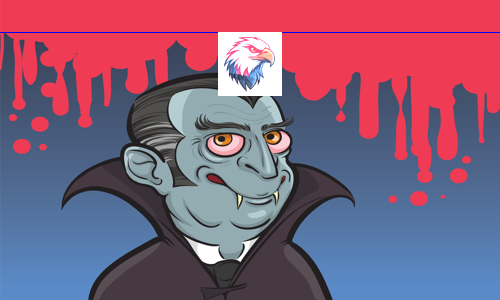

In [9]:
img=Image.fromarray(image_logow,"RGB")
img

# Text Overlay on Image

To add a custom message to the image, the following steps were performed:

1. **Text Conversion**: The image was first converted into RGB format to ensure it supports text overlays.
2. **Text Placement**: The text `"I love Twilight Movie"` was added to the image using OpenCV’s `cv2.putText`. The text was positioned near the bottom-right corner of the image, ensuring it doesn't overlap with important content.
3. **Text Styling**: The text was styled using a red color (`(0,0,255)`), with a thickness of 2 pixels for visibility. The font used was `FONT_HERSHEY_COMPLEX`, and the text size was set using `fontScale=0.5`.

This ensures that the message is clearly visible on the image.


In [10]:
image_text=np.array(image_text.convert("RGB"))
cv2.putText(image_text,text="I love Twilight Movie",org=(w_image-200,h_image-10),fontFace=cv2.FONT_HERSHEY_COMPLEX,fontScale=0.5,
           color=(0,0,255),thickness=2,lineType=cv2.LINE_4)

array([[[238,  66,  90],
        [240,  58,  84],
        [239,  59,  84],
        ...,
        [239,  59,  84],
        [239,  59,  84],
        [239,  59,  84]],

       [[238,  66,  90],
        [240,  58,  84],
        [239,  59,  84],
        ...,
        [239,  59,  84],
        [239,  59,  84],
        [239,  59,  84]],

       [[238,  66,  90],
        [240,  58,  84],
        [239,  59,  84],
        ...,
        [239,  59,  84],
        [239,  59,  84],
        [239,  59,  84]],

       ...,

       [[ 96, 143, 200],
        [ 89, 139, 201],
        [ 90, 138, 200],
        ...,
        [ 90, 138, 200],
        [ 90, 138, 200],
        [ 90, 138, 200]],

       [[ 96, 143, 200],
        [ 89, 139, 201],
        [ 90, 138, 200],
        ...,
        [ 90, 138, 200],
        [ 90, 138, 200],
        [ 90, 138, 200]],

       [[ 96, 143, 200],
        [ 89, 139, 201],
        [ 90, 138, 200],
        ...,
        [ 90, 138, 200],
        [ 90, 138, 200],
        [ 90, 138, 200]]

# Final Image with Text

- After adding the text overlay, the image was converted back into an **Image** object using the `Image.fromarray` method. This allows the image with the custom text to be in a proper format for display or saving.

The final image with the text "I love Twilight Movie" is now ready to be shown or saved.


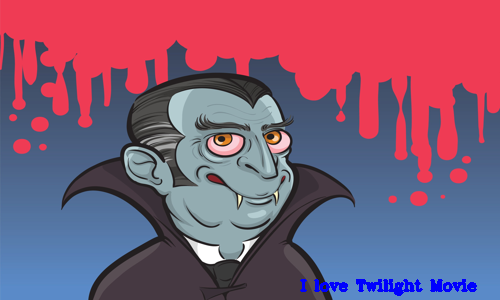

In [11]:
text_img=Image.fromarray(image_text,"RGB")
text_img